# Steering Data Analysis


## 0. Import libraries and files


In [156]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np


In [157]:

font_paths = font_manager.findSystemFonts()
for path in font_paths:
    print(path)


/System/Library/Fonts/Supplemental/Apple Chancery.ttf
/System/Library/Fonts/Supplemental/Academy Engraved LET Fonts.ttf
/System/Library/Fonts/Supplemental/Gurmukhi Sangam MN.ttc
/System/Library/Fonts/ThonburiUI.ttc
/System/Library/Fonts/Supplemental/NotoSansElbasan-Regular.ttf
/System/Library/Fonts/Supplemental/NotoSansMro-Regular.ttf
/System/Library/Fonts/Supplemental/NotoSansNabataean-Regular.ttf
/System/Library/Fonts/Supplemental/Myanmar Sangam MN.ttc
/System/Library/Fonts/NotoSansArmenian.ttc
/System/Library/Fonts/Supplemental/STIXIntSmBol.otf
/System/Library/Fonts/Supplemental/Arial Narrow Bold.ttf
/System/Library/Fonts/Supplemental/NotoSansPhagsPa-Regular.ttf
/System/Library/Fonts/Apple Braille Pinpoint 8 Dot.ttf
/System/Library/Fonts/Supplemental/Courier New Bold.ttf
/System/Library/Fonts/Supplemental/Papyrus.ttc
/System/Library/Fonts/Supplemental/Zapfino.ttf
/System/Library/Fonts/Supplemental/NotoSansOldSouthArabian-Regular.ttf
/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc
/System/L

In [158]:
# 폰트 적용
font_path = '/System/Library/Fonts/Supplemental/Arial Unicode.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


In [176]:
data_path = "/Users/ym/dev/DA/실험자2/조향데이터"
reps_path = "/Users/ym/dev/DA/실험자2/돌발상황"

split_path = data_path.split("/")
experimenter_name= split_path[-2]
print(experimenter_name)

file_names = os.listdir(data_path)
file_paths = [os.path.join(data_path, file_name) for file_name in file_names if file_name.endswith('.csv')]
file_paths.sort(reverse=False)
print(file_paths[0])


실험자2
/Users/ym/dev/DA/실험자2/조향데이터/data_20230517_120328.csv


In [160]:
data_list = []  # 데이터프레임을 저장할 리스트

# 파일을 순회하며 데이터프레임 생성 후 리스트에 추가
for file_path in file_paths:
    data = pd.read_csv(file_path)
    data_list.append(data)



In [161]:
for i, data in enumerate(data_list):
    


    data['엑셀_미분'] = data.iloc[:, 1].diff()
    data['브레이크_미분'] = data.iloc[:, 2].diff()

    # print(data)
    null_rows = data[data.isnull().any(axis=1)]
    # print(null_rows)



    # # 변수의 max와 min값 확인
    # print(data.iloc[:, 0].max(), data.iloc[:, 0].min())
    # print(data.iloc[:, 1].max(), data.iloc[:, 1].min())
    # print(data.iloc[:, 2].max(), data.iloc[:, 2].min())

    # 조향각의 범위를 0~2로 정규화 후,조향각을 0부터 360도 사이의 스티어링 각도로 변환
    data['스티어링_각도'] = ((data.iloc[:, 0] + 1) * 180)

    data.columns = data.columns + f"_{i+1}"

    # 결측치 채우기
    data = data.fillna(0)
    # print(data.isna())
    # print(data_2.columns)
    # print(data)

# 각 데이터프레임 변수에 할당
data_1, data_2, data_3, data_4, data_5, data_6, data_7, data_8 = data_list[:len(file_paths)]

print(data_8)

          조향각_8      엑셀_8    브레이크_8  엑셀_미분_8  브레이크_미분_8   스티어링_각도_8
0      0.000519  0.999969  0.999969      NaN        NaN  180.093384
1      0.000519  0.999969  0.999969      0.0        0.0  180.093384
2      0.000519  0.999969  0.999969      0.0        0.0  180.093384
3      0.000519  0.999969  0.999969      0.0        0.0  180.093384
4      0.000519  0.999969  0.999969      0.0        0.0  180.093384
...         ...       ...       ...      ...        ...         ...
23457  0.018524 -1.000000  0.999969      0.0        0.0  183.334351
23458  0.018524 -1.000000  0.999969      0.0        0.0  183.334351
23459  0.018524 -1.000000  0.999969      0.0        0.0  183.334351
23460  0.018524 -1.000000  0.999969      0.0        0.0  183.334351
23461  0.018524 -1.000000  0.999969      0.0        0.0  183.334351

[23462 rows x 6 columns]


## 1. Give Each Data Derived Variables

In [162]:
# merged_data = pd.concat(data_list, axis=1)
# print(merged_data)

In [163]:
# # Create a dictionary to store the dataframes
# dataframes = {
#     'data_1': data_1,
#     'data_2': data_2,
#     'data_3': data_3,
#     'data_4': data_4,
#     'data_5': data_5,
#     'data_6': data_6,
#     'data_7': data_7,
#     'data_8': data_8
# }

# # Get user input
# user_input = input("Enter a number (1-8): ")

# # Check if the user input is valid
# if user_input.isdigit() and 1 <= int(user_input) <= 8:
#     # Get the corresponding dataframe based on user input
#     df = dataframes[f"data_{user_input}"]
#     print(f"Assigned df = data_{user_input}")
# else:
#     print("Invalid input. Please enter a number between 1 and 8.")


In [164]:
def generate_plots(df, experimenter_name):
    fig, axs = plt.subplots(6, 1, figsize=(8, 12))

    # 조향각 그래프
    axs[0].plot(df.index, df.iloc[:, 0])
    axs[0].set_ylabel('조향각'+df.columns[0][-2:])

    # 엑셀 그래프
    axs[1].plot(df.index, df.iloc[:, 1])
    axs[1].set_ylabel('엑셀'+df.columns[0][-2:])

    # 브레이크 그래프
    axs[2].plot(df.index, df.iloc[:, 2])
    axs[2].set_ylabel('브레이크'+df.columns[0][-2:])

    # 엑셀 미분 그래프
    axs[3].plot(df.index, df.iloc[:, 3])
    axs[3].set_ylabel('엑셀_미분'+df.columns[0][-2:])

    # 브레이크 미분 그래프
    axs[4].plot(df.index, df.iloc[:, 4])
    axs[4].set_ylabel('브레이크_미분'+df.columns[0][-2:])

    # 스티어링 각도 그래프 (원형 그래프)
    theta = np.deg2rad(df.iloc[:, 5]) - np.pi/2  # 90도 회전
    axs[5] = plt.subplot(6, 1, 6, projection='polar')
    axs[5].plot(theta, df.index)
    axs[5].set_xticks(np.linspace(0, 2*np.pi, 12, endpoint=False))  # x축 눈금 설정
    axs[5].set_ylabel('스티어링_각도'+df.columns[0][-2:])
    axs[5].yaxis.set_label_coords(-0.5, 0.5)  # ylabel 위치 조정
    axs[5].set_yticklabels([])  # x축 라벨 숨김
    
   
    # 전체 그래프 제목
    plt.suptitle(f"{experimenter_name}{df.columns[0][-2:]}번째 실험")

    # 그래프 간격 조정
    plt.tight_layout()

    # Save the plot as an image
    image_name = experimenter_name + '_result_1' + df.columns[0][-2:] + '.png'
    plt.savefig(image_name)

    # 그래프 출력
    plt.show()




In [165]:
def plot_car_movement(df):
    fig, ax = plt.subplots(figsize=(1, 6))
    ax.plot([0], [0], marker='o')  # Starting point

    # Initialize variables
    speed = 0
    x = 0
    y = 0

    # Iterate over the dataframe
    for i, row in df.iterrows():
        steering = row.iloc[0]
        acceleration = row.iloc[1]
        brake = row.iloc[2]

        # Update speed based on acceleration and brake
        speed += (acceleration - brake)

        # Update x and y positions based on speed and steering
        x = steering
        y += speed
        # Plot the current position
        ax.plot([x], [y], marker='*', markersize=5, color='green')
        # print(x,y)

    # 전체 그래프 제목
    plt.suptitle(f"{experimenter_name}{df.columns[0][-2:]}번째 실험_동선")
   
    # 그래프 간격 조정
    plt.tight_layout()

    # Save the plot as an image
    image_name = experimenter_name + '_result_2' + df.columns[0][-2:] + '.png'
    plt.savefig(image_name)
    
    plt.show()

# plot_car_movement(df)

/var/folders/f9/nlljc1hn2wzbg_gx8r85q1280000gn/T/ipykernel_3251/2872629661.py:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axs[5] = plt.subplot(6, 1, 6, projection='polar')


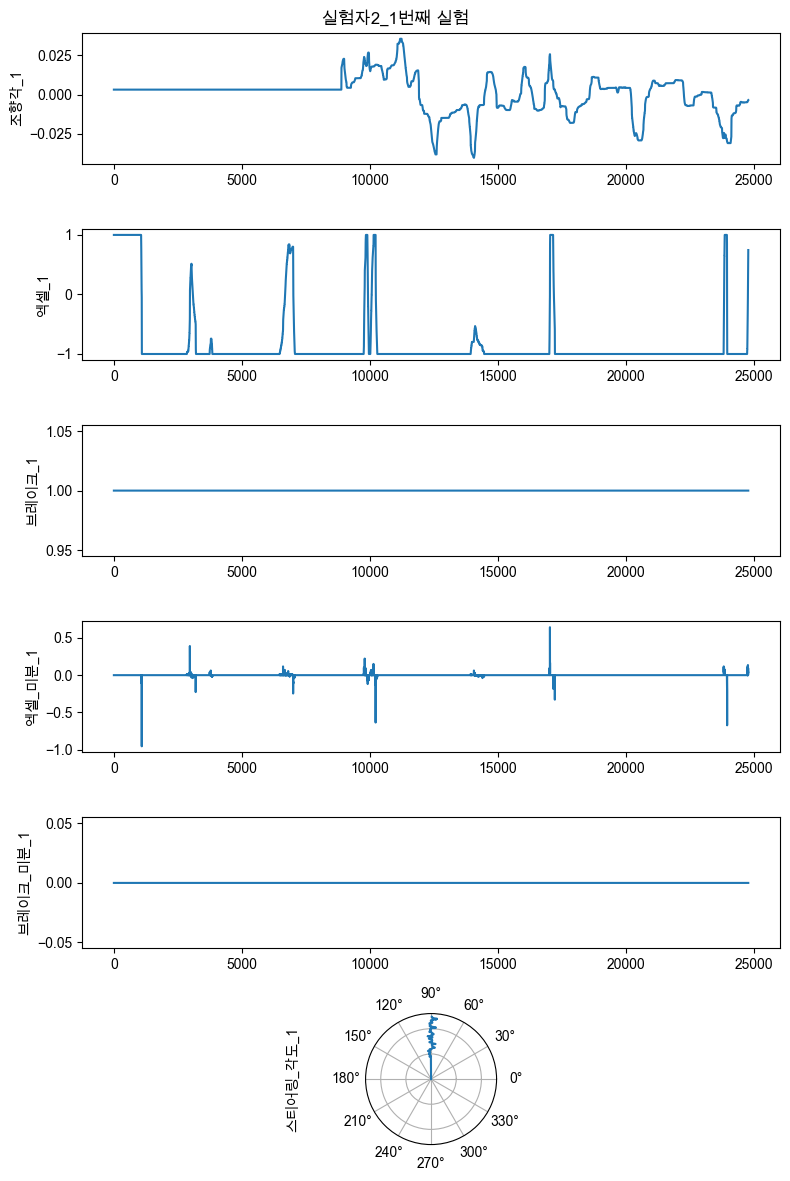

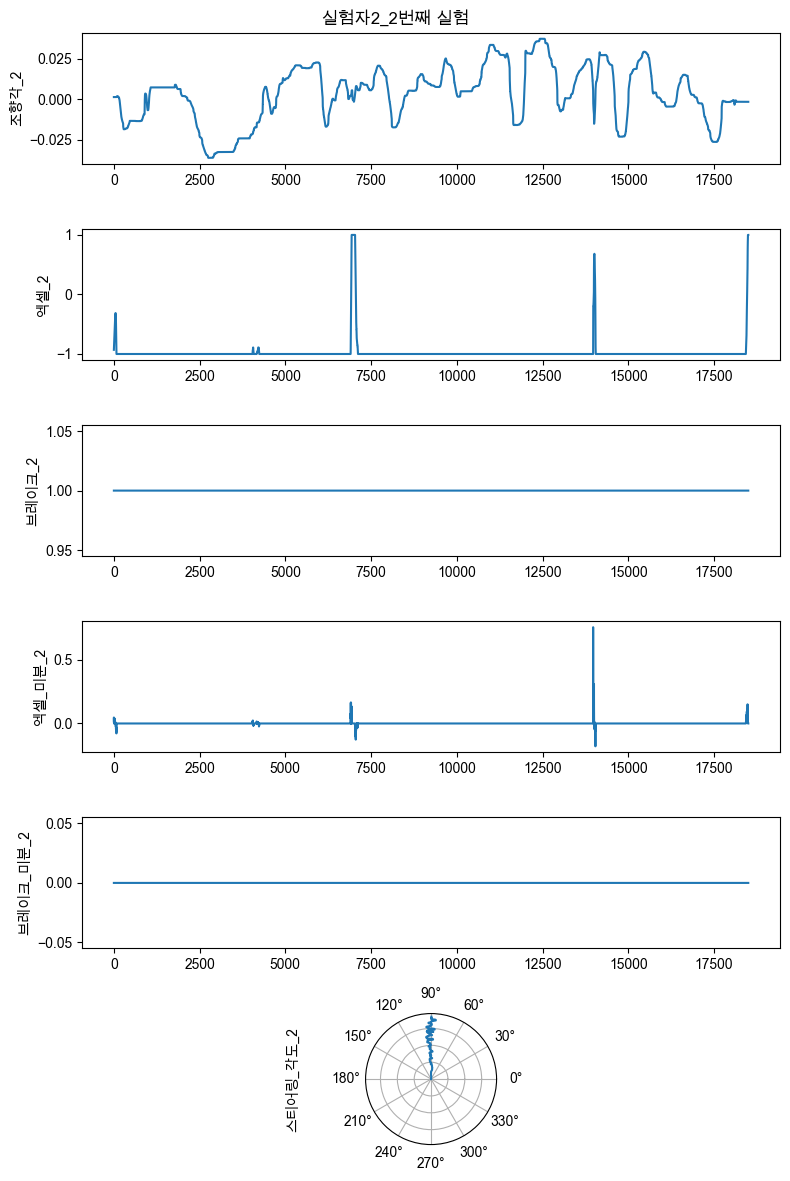

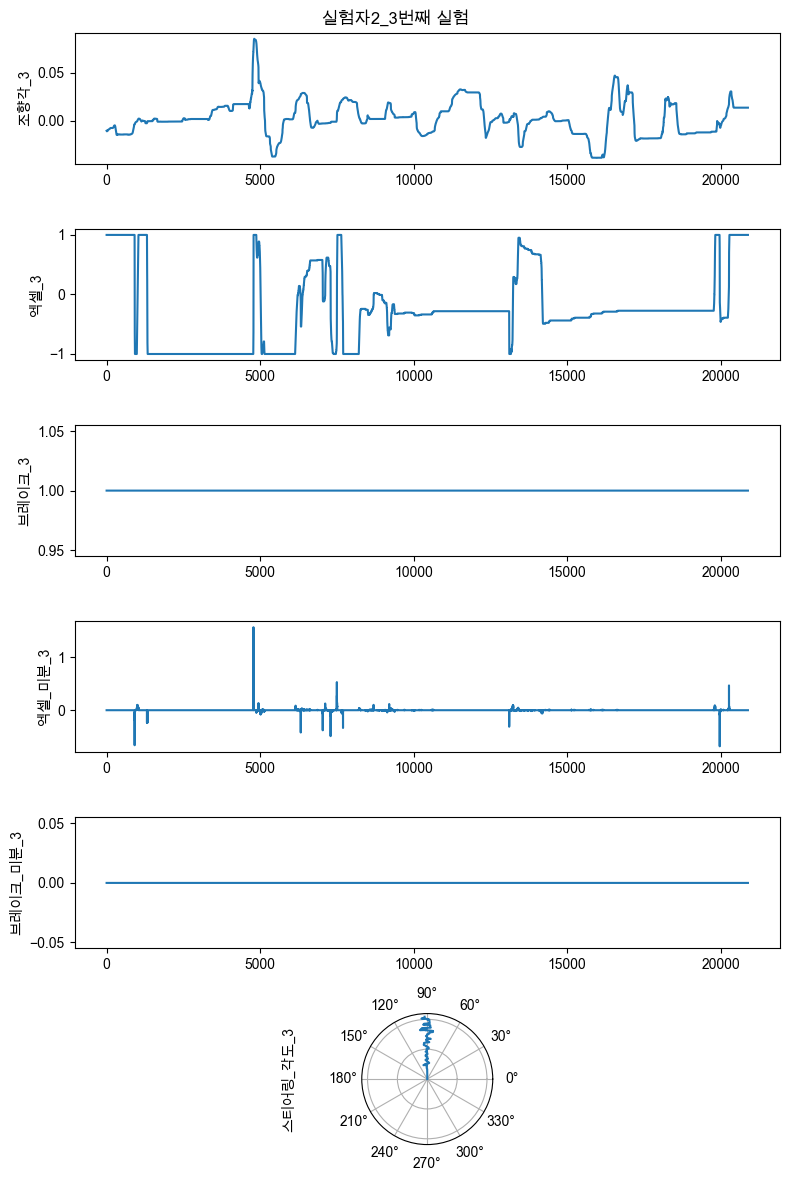

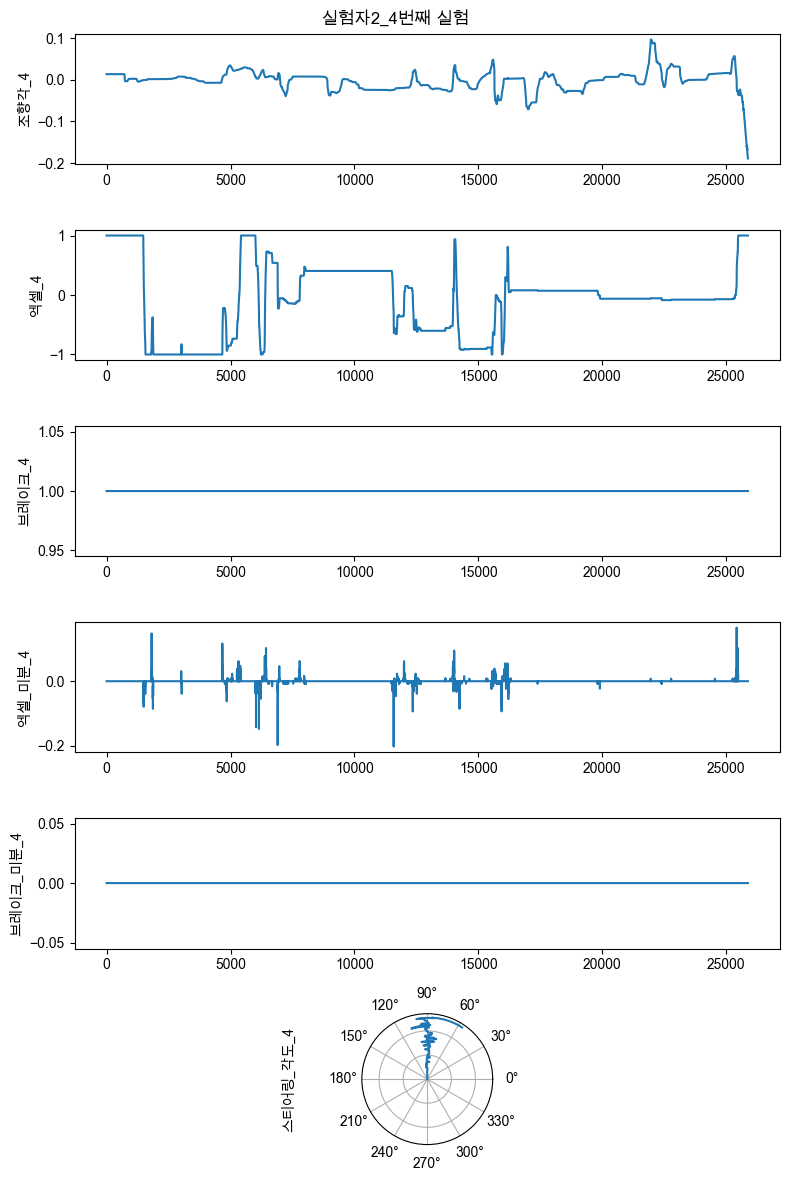

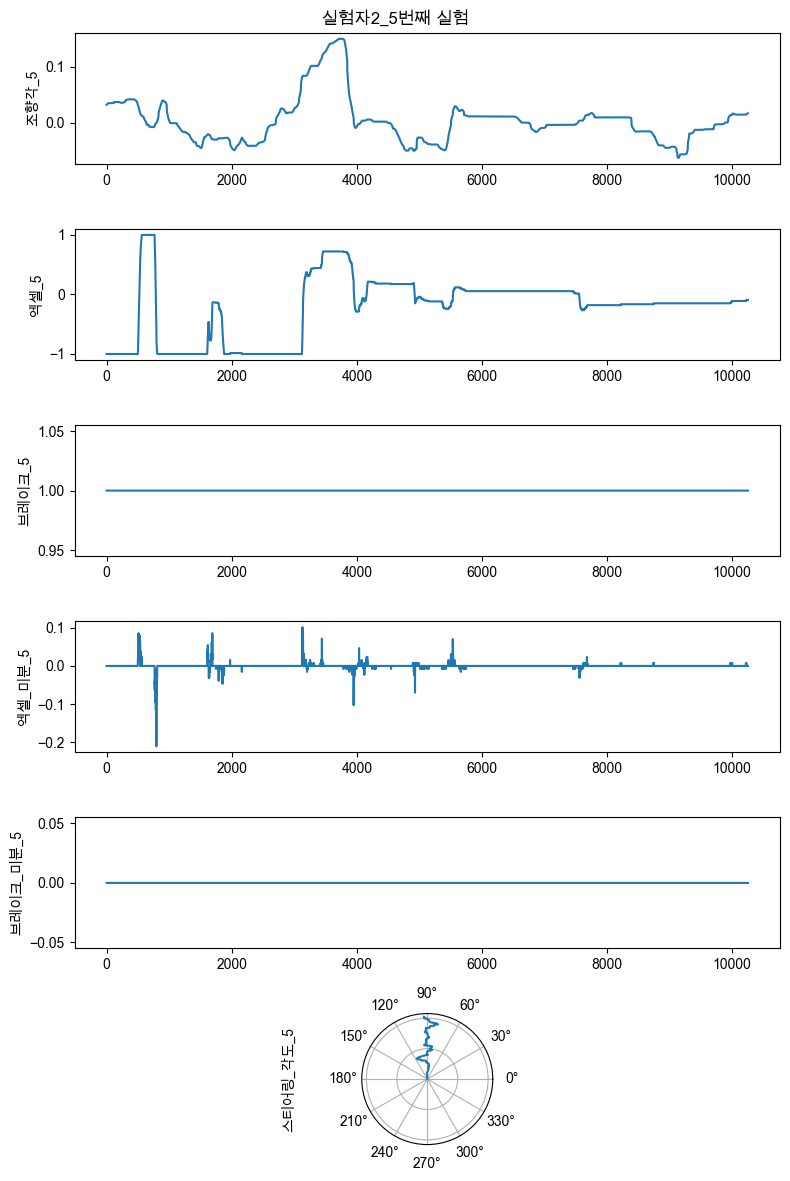

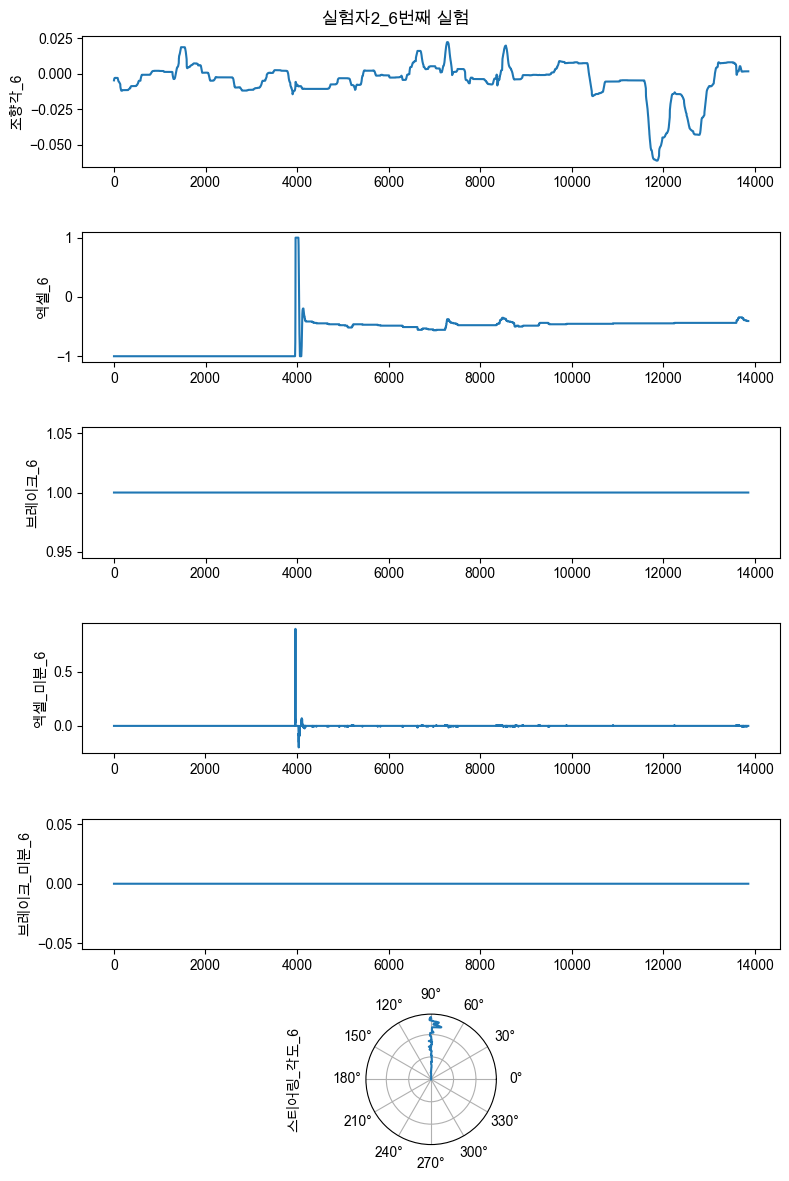

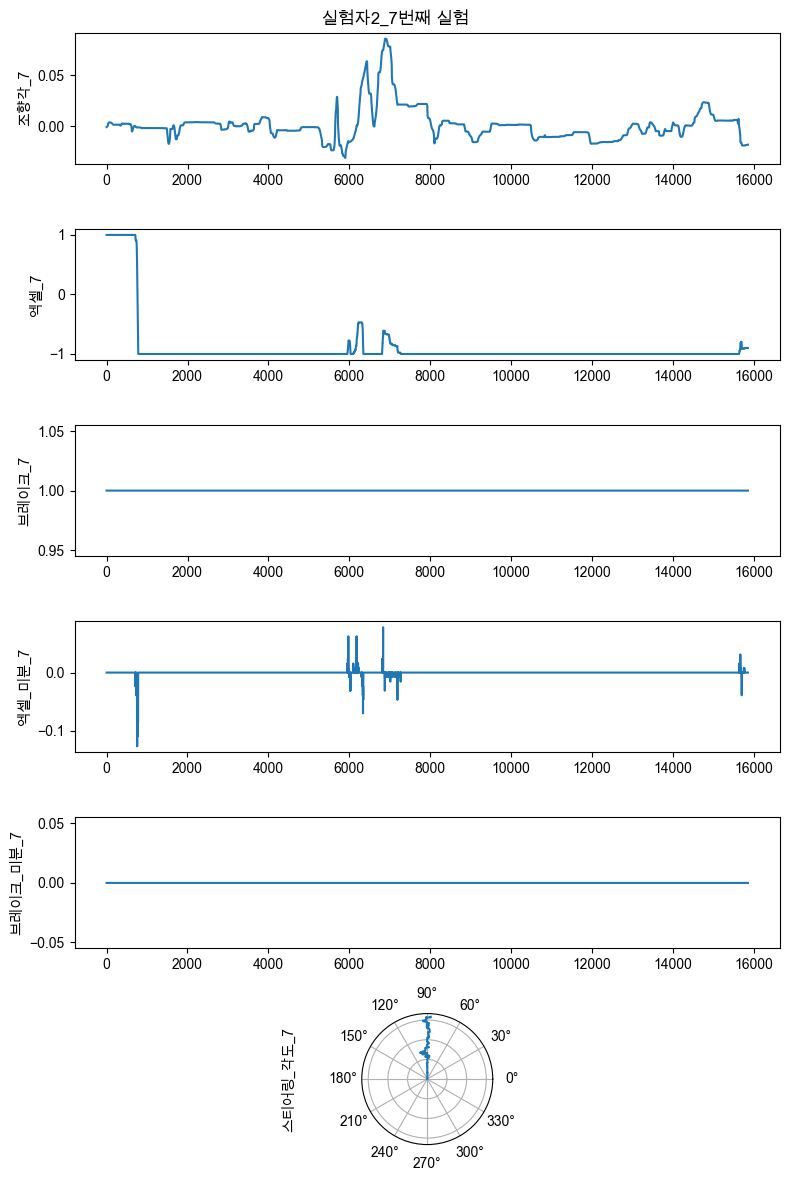

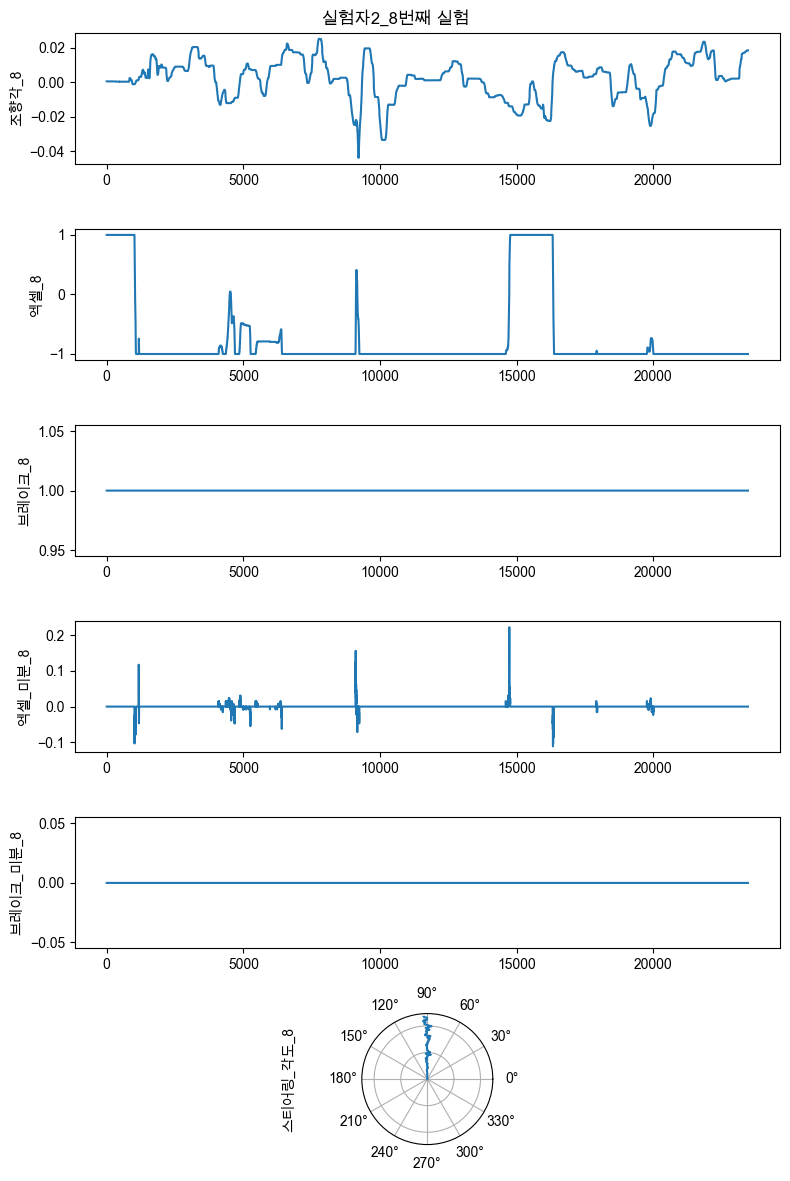

In [166]:
for data in data_list:
    generate_plots(data, experimenter_name)

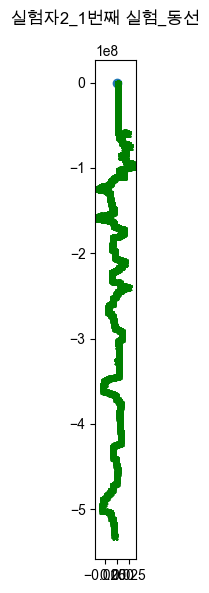

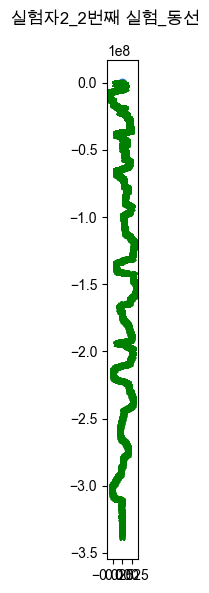

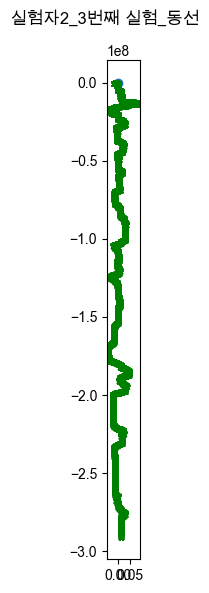

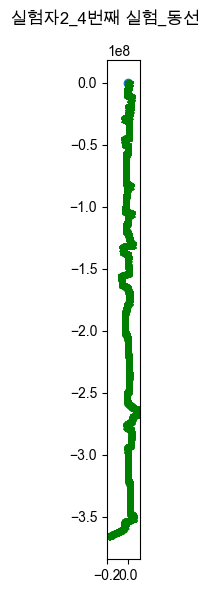

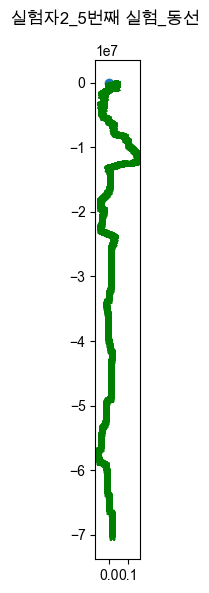

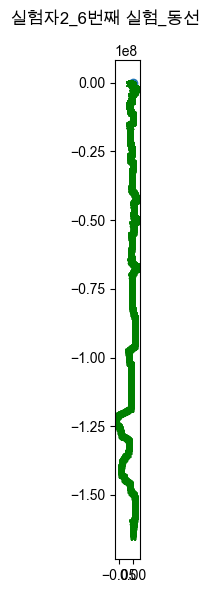

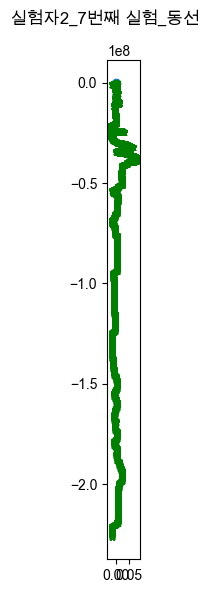

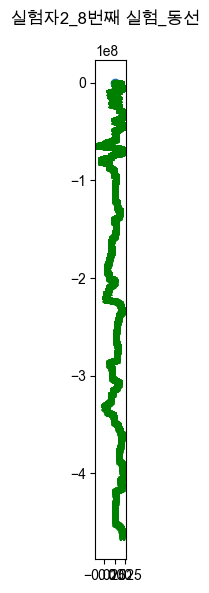

In [167]:
for data in data_list:
    plot_car_movement(data)

In [213]:
def plot_reaction_time(file_path, file_name):
    # 파일 읽기
    with open(file_path, 'r') as file:
        data = file.readlines()
    data = [float(d.strip()) for d in data]

    # 데이터프레임 생성
    df = pd.DataFrame(data, columns=['Reaction Time'])

    # 상자 그림 그리기
    plt.figure(figsize=(8, 6))
    plt.boxplot(df['Reaction Time'])
    plt.xlabel('Reaction Time')
    plt.ylabel('Value')

    # 전체 그래프 제목
    split_name = file_name.split("_")[-1].split('.')[0]
    plt.title(f"{experimenter_name}_반응 시간_{split_name}")
   
    # 그래프 간격 조정
    plt.tight_layout()

    # Save the plot as an image
    image_name = f"{experimenter_name}_result_3_{split_name}.png"
    plt.savefig(image_name)
    plt.grid(True)
    plt.show()


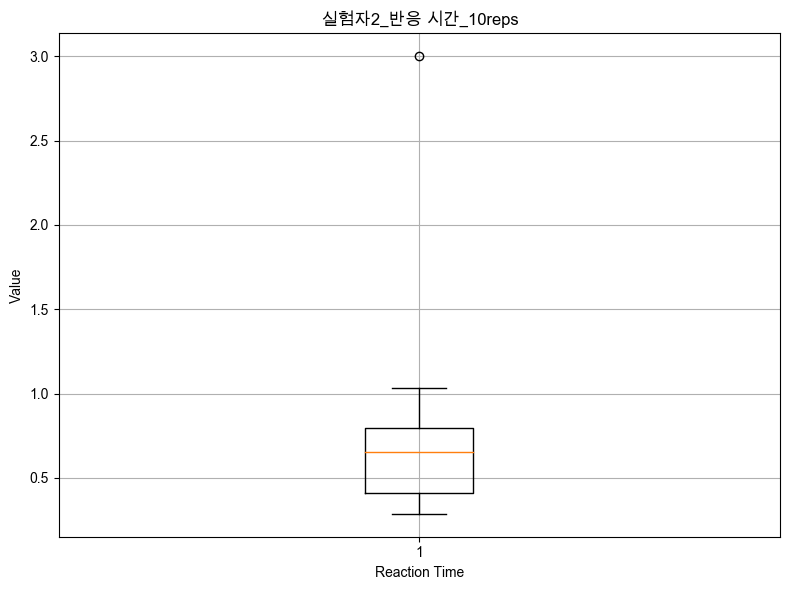

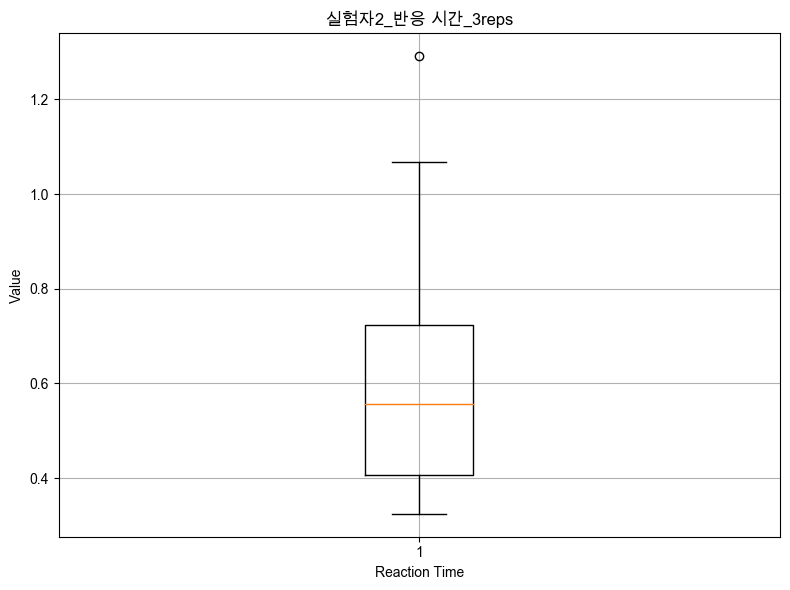

In [214]:
for file_name in os.listdir(reps_path):
    if file_name.endswith('.txt'):  # .txt 확장자를 가진 파일만 선택
        file_path = os.path.join(reps_path, file_name)  # 파일 경로 생성
        plot_reaction_time(file_path, file_name) 